# Analisis data bivariat dan multivariat

## Data bivariat 

Data bivariat mendeskripsikan hubungan antar dua buah variabel. Misalnya:
* Hubungan antara berat dan tinggi badan.
* Hubungan antara risiko penyakit jantung dengan jenis kelamin.
*  dll.

Data bivariat, terdiri dari:
* 2 variabel kualitatif
* 1 variabel kualitatif dan 1 variabel kuantitatif.
* 2 variabel kuantitatif.

### Data bivariat kualitatif

In [5]:
ratings <- factor(c(2,4,3,3,2,1,1,2,3,4,2,3,3,4,1,3,2,4,3,2,1))
ratings 

[1] 2 4 3 3 2 1 1 2 3 4 2 3 3 4 1 3 2 4 3 2 1
Levels: 1 2 3 4

In [7]:
kursus <- factor(c(1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1))
kursus

[1] 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1
Levels: 0 1

In [9]:
levels(kursus) <- c('R', 'Python')

In [10]:
table(ratings, kursus)

       kursus
ratings R Python
      1 1      3
      2 3      3
      3 4      3
      4 2      2

In [11]:
table(kursus, ratings)

        ratings
kursus   1 2 3 4
  R      1 3 4 2
  Python 3 3 3 2

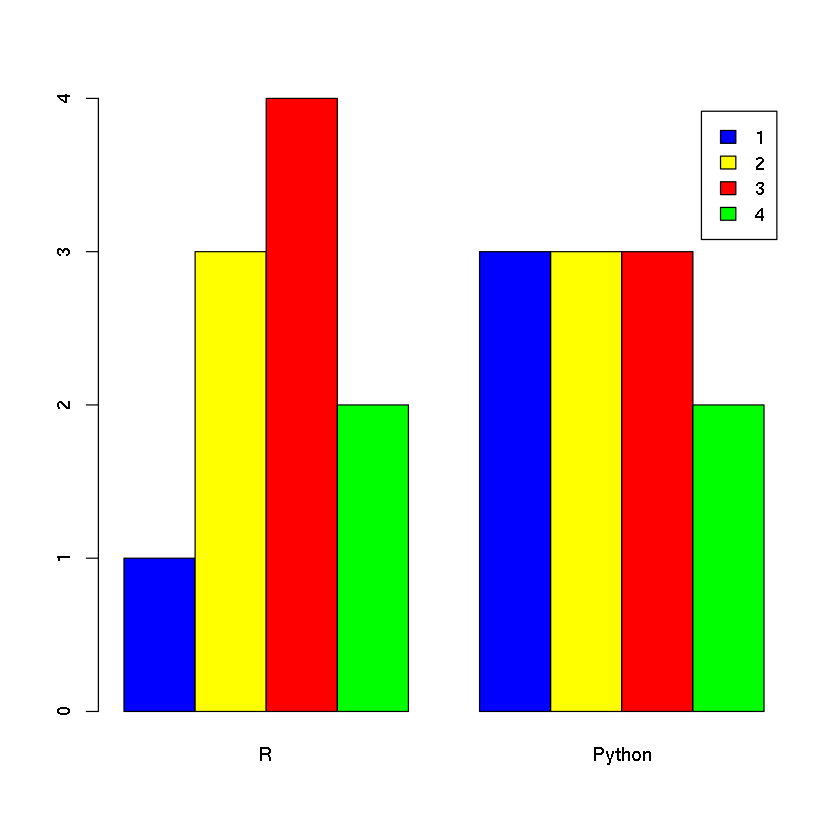

In [16]:
barplot(table(ratings, kursus),
       col=c('blue', 'yellow', 'red', 'green'), legend=T, beside=T)

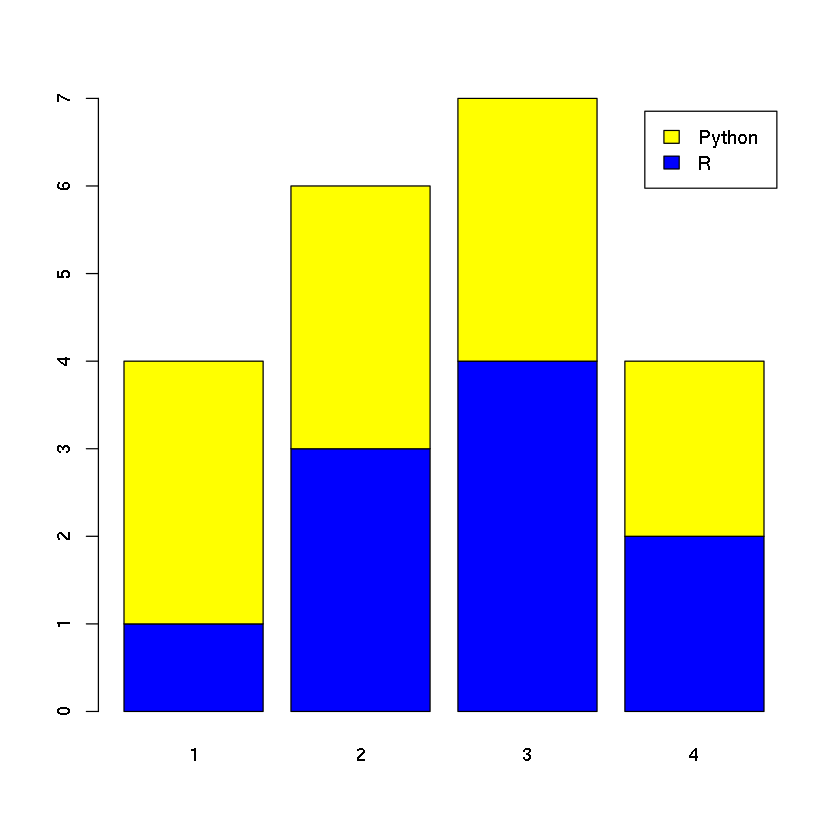

In [14]:
barplot(table(kursus, ratings),
       col=c('blue', 'yellow', 'red', 'green'),
       legend.text=T)

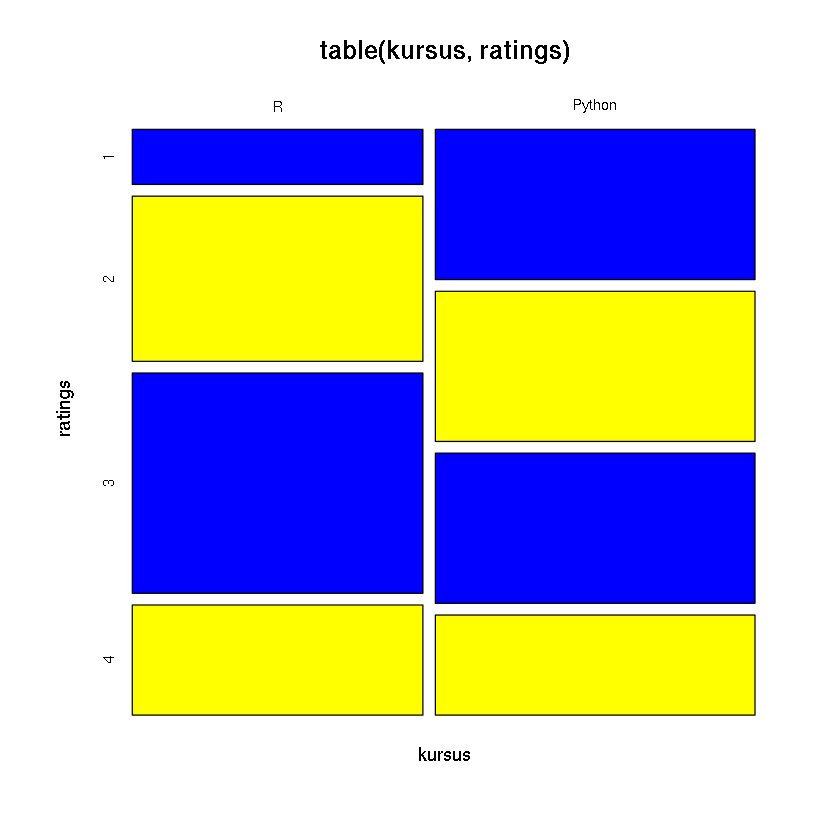

In [21]:
mosaicplot(table(kursus,ratings),
          col=c('blue', 'yellow'))

### Data bivariat kuantitatif